In [1]:
import pyoncoprint

In [2]:
import pandas as pd

In [3]:
# Data downloaded from: https://www.cbioportal.org/results/oncoprint?Z_SCORE_THRESHOLD=2.0&RPPA_SCORE_THRESHOLD=2.0&data_priority=0&profileFilter=0&case_set_id=luad_tcga_pan_can_atlas_2018_cnaseq&gene_list=KRAS%2520HRAS%2520BRAF%2520RAF1%2520MAP3K1%2520MAP3K2%2520MAP3K3%2520MAP3K4%2520MAP3K5%2520MAP2K1%2520MAP2K2%2520MAP2K3%2520MAP2K4%2520MAP2K5%2520MAPK1%2520MAPK3%2520MAPK4%2520MAPK6%2520MAPK7%2520MAPK8%2520MAPK9%2520MAPK12%2520MAPK14%2520DAB2%2520RASSF1%2520RAB25&geneset_list=%20&tab_index=tab_visualize&Action=Submit&genetic_profile_ids_PROFILE_MUTATION_EXTENDED=luad_tcga_pan_can_atlas_2018_mutations&genetic_profile_ids_PROFILE_COPY_NUMBER_ALTERATION=luad_tcga_pan_can_atlas_2018_gistic&cancer_study_list=luad_tcga_pan_can_atlas_2018
df = pd.read_csv('./tcga.tsv', sep='\t', header=0, index_col='track_name').drop(columns=['track_type']).dropna(how='all')

In [4]:
mutation_markers = {
    "Amplification": dict(
        marker="fill",
        color="red"
    ),
    "Deep Deletion": dict(
        marker="fill",
        color="blue"
    ),
    "Fusion": dict(
        marker="*",
        color="purple"
    ),
    "Inframe Mutation (putative driver)": dict(
        marker="fill",
        color="brown",
        height=0.5
    ),
    "Missense Mutation (putative driver)": dict(
        marker="fill",
        color="green",
        height=0.5
    ),
    "Missense Mutation (putative passenger)": dict(
        marker="fill",
        color="lime",
        height=0.5
    ),
    "Truncating mutation (putative driver)": dict(
        marker="fill",
        color="black",
        height=0.5
    ),
    "Truncating mutation (putative passenger)": dict(
        marker="fill",
        color="yellow",
        height=0.5
    ),
}
mutation_zorders = ['Amplification', 'Deep Deletion', 'Fusion',
       'Inframe Mutation (putative driver)',
       'Missense Mutation (putative driver)',
       'Missense Mutation (putative passenger)',
       'Truncating mutation (putative driver)',
       'Truncating mutation (putative passenger)']

In [5]:
op = pyoncoprint.OncoPrint(df, zorders=mutation_zorders)

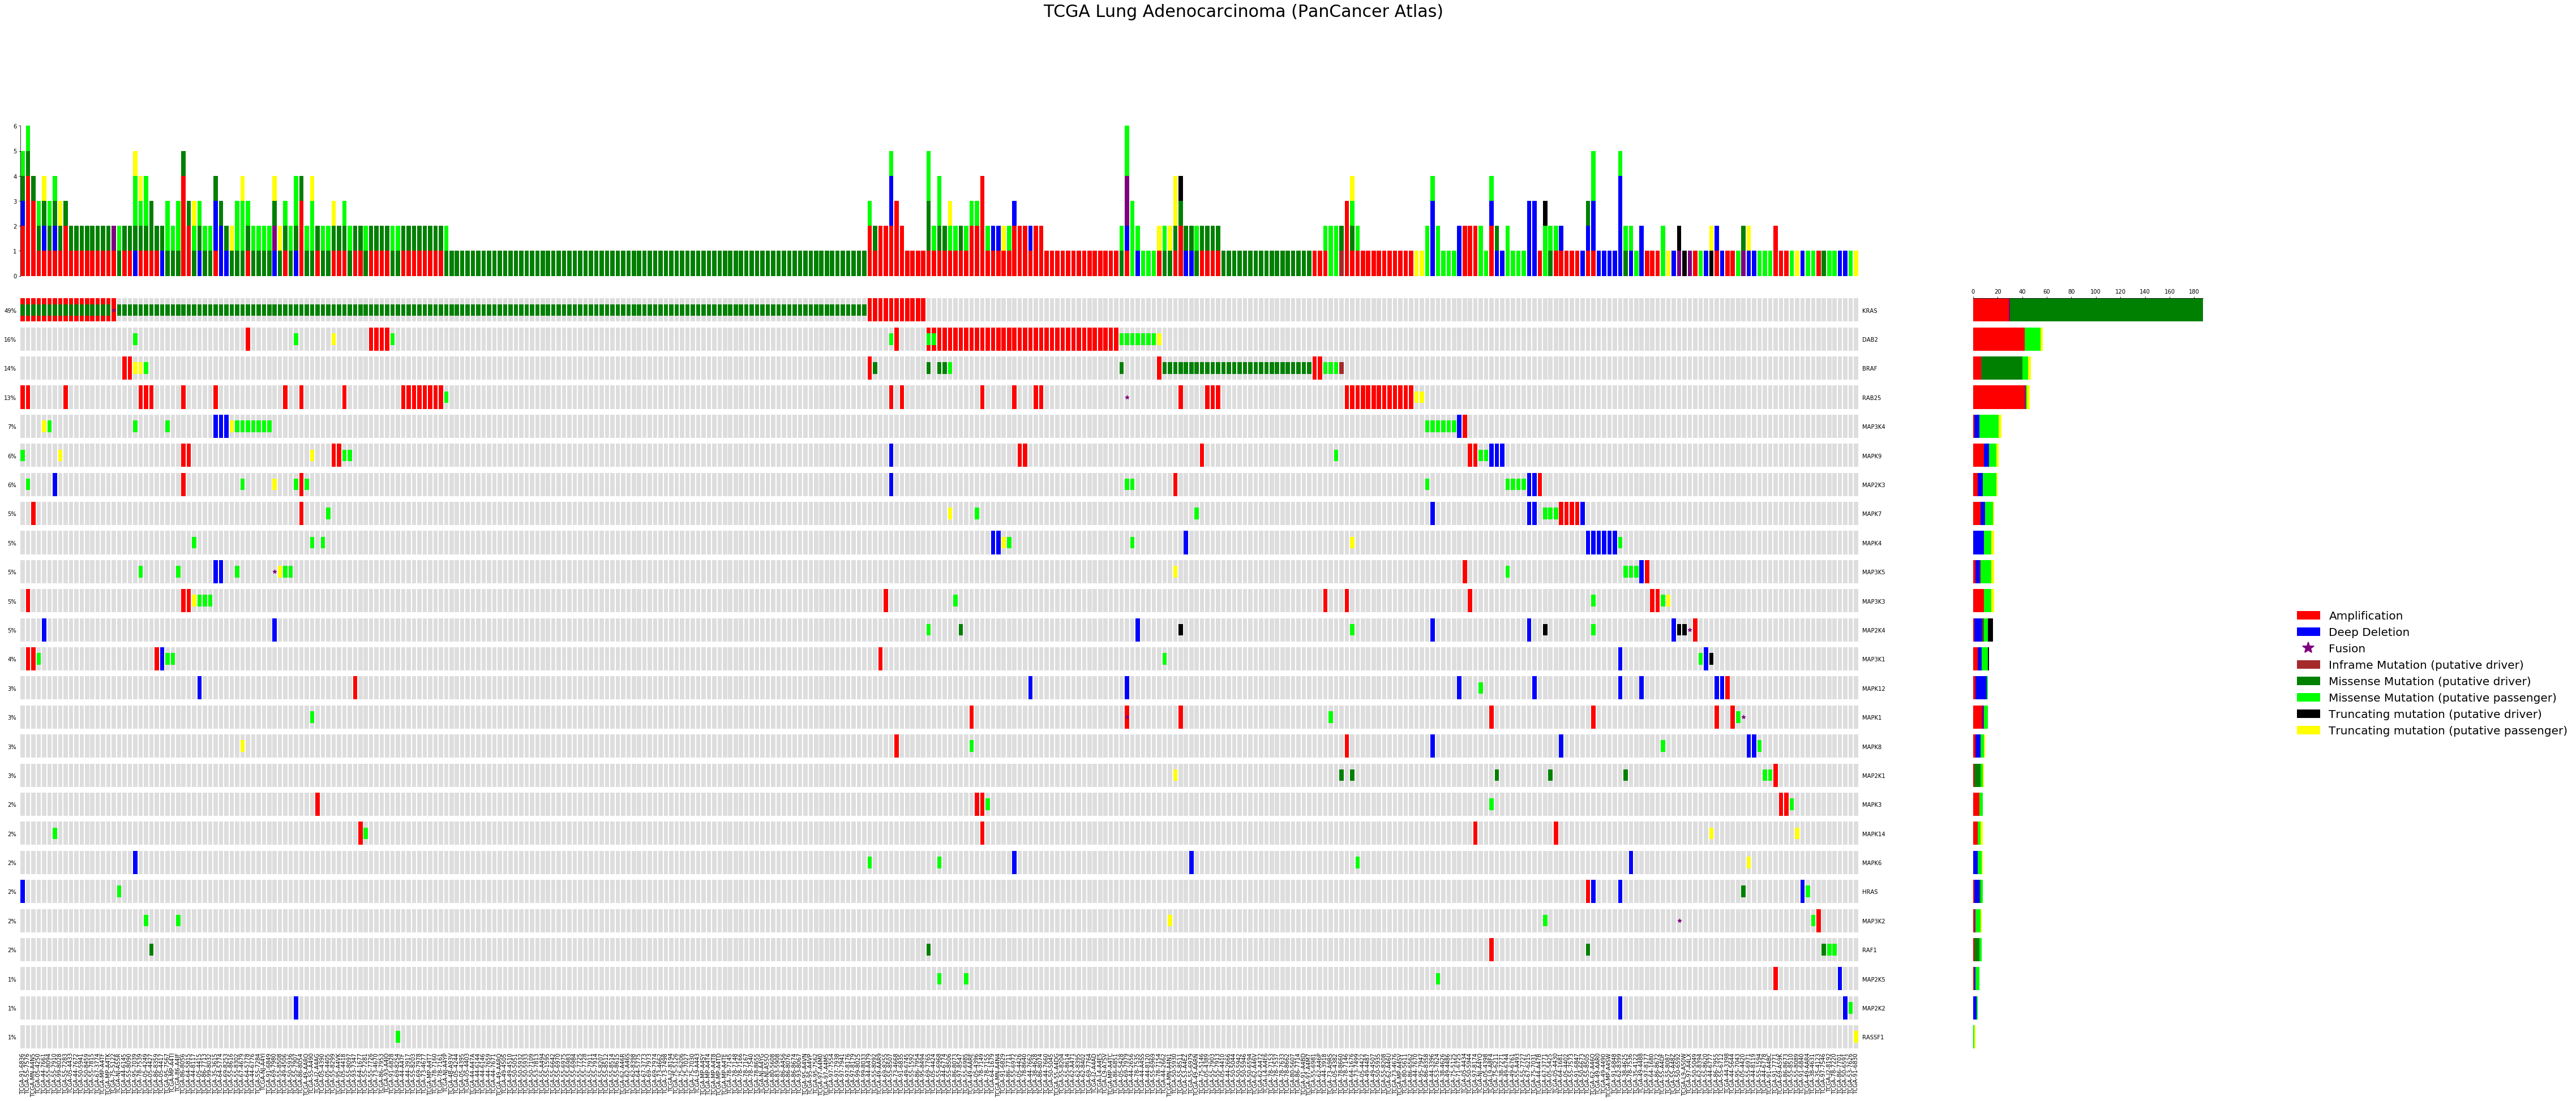

In [6]:
op.oncoprint(mutation_markers, sort_method="default", figsize=[80,30], title="TCGA Lung Adenocarcinoma (PanCancer Atlas)")
pass